In [437]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC,LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
import sqlite3
import re
import nltk
import spacy
from nltk.corpus import stopwords
import wordcloud

In [4]:
conn=sqlite3.connect('database.sqlite')

In [5]:
df=pd.read_sql_query('SELECT * FROM REVIEWS',conn)

In [6]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [7]:
df.shape

(568454, 10)

In [8]:
df['Score']=np.where(df['Score']>3,'Positive','Negative')

In [9]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,Positive,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,Negative,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,Positive,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,Negative,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,Positive,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [10]:
df['Score'].value_counts(normalize=True)

Positive    0.780674
Negative    0.219326
Name: Score, dtype: float64

In [11]:
df.isnull().sum()

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64

In [12]:
df.duplicated().sum()

0

In [13]:
df[df['HelpfulnessNumerator']>df['HelpfulnessDenominator']]

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
44736,44737,B001EQ55RW,A2V0I904FH7ABY,Ram,3,2,Positive,1212883200,Pure cocoa taste with crunchy almonds inside,It was almost a 'love at first bite' - the per...
64421,64422,B000MIDROQ,A161DK06JJMCYF,"J. E. Stephens ""Jeanne""",3,1,Positive,1224892800,Bought This for My Son at College,My son loves spaghetti so I didn't hesitate or...


In [14]:
df=df[df['HelpfulnessNumerator']<=df['HelpfulnessDenominator']]

In [15]:
df.shape

(568452, 10)

In [16]:
df['ProductId'].nunique()

74258

In [17]:
df.head(50)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,Positive,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,Negative,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,Positive,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,Negative,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,Positive,1350777600,Great taffy,Great taffy at a great price. There was a wid...
5,6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,Positive,1342051200,Nice Taffy,I got a wild hair for taffy and ordered this f...
6,7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,Positive,1340150400,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...
7,8,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,Positive,1336003200,"Wonderful, tasty taffy",This taffy is so good. It is very soft and ch...
8,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,Positive,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...
9,10,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,Positive,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...


In [64]:
x=df.sort_values(by=['ProductId'])

In [65]:
del x["Id"]

In [66]:
#x[x.duplicated(subset=['ProductId','UserId','ProfileName','Score','Time','Summary','Text'])]

In [67]:
#x.drop_duplicates(subset=['ProductId','UserId','ProfileName','Score','Time','Summary','Text'],inplace=True)

In [68]:
x.duplicated(subset=['Text']).sum()

174875

In [69]:
x.drop_duplicates(subset=['Text'],inplace=True)

In [70]:
x.head()

,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
150522,0006641040,A2P4F2UO0UMP8C,"Elizabeth A. Curry ""Lovely Librarian""",0,0,Positive,1096675200,MMMM chicken soup....,Summary: A young boy describes the usefulness...
150507,0006641040,AZGXZ2UUK6X,"Catherine Hallberg ""(Kate)""",1,1,Positive,1076025600,a good swingy rhythm for reading aloud,This is a great little book to read aloud- it ...
150506,0006641040,A1S4A3IQ2MU7V4,"sally sue ""sally sue""",1,1,Positive,1191456000,chicken soup with rice months,This is a fun way for children to learn their ...
150505,0006641040,A2IW4PEEKO2R0U,Tracy,1,1,Positive,1194739200,"Love the book, miss the hard cover version","I grew up reading these Sendak books, and watc..."
150504,0006641040,A2PTSM496CF40Z,"Jason A. Teeple ""Nobody made a greater mistak...",1,1,Positive,1210809600,A classic,Get the movie or sound track and sing along wi...


In [71]:
x.shape

(393577, 9)

In [72]:
x['Score'].value_counts(normalize=True)

Positive    0.779403
Negative    0.220597
Name: Score, dtype: float64

In [73]:
x=x.loc[:,['Text','Score']]

In [74]:
x.head()

,Text,Score
150522,Summary: A young boy describes the usefulness...,Positive
150507,This is a great little book to read aloud- it ...,Positive
150506,This is a fun way for children to learn their ...,Positive
150505,"I grew up reading these Sendak books, and watc...",Positive
150504,Get the movie or sound track and sing along wi...,Positive


In [75]:
contractions = { 
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"I'd": "I had",
"I'd've": "I would have",
"I'll": "I will",
"I'll've": "I will have",
"I'm": "I am",
"I've": "I have",
"isn't": "is not",
"it'd": "it had",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so is",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there had",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they had",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what shall have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you would",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have"
}

In [203]:
remove_textin_brackets_pattern=r'(\(|{|\[).*?(\)|}|\])'

In [204]:
x['Text']=x['Text'].apply(lambda x:re.sub(remove_textin_brackets_pattern,'',str(x)).lower().strip())

In [206]:
remove_url_pattern = r'((http|ftp|https):\/\/)?[\w\-_]+(\.[\w\-_]+)+([\w\-\.,@?^=%&amp;:/~\+#]*[\w\-\@?^=%&amp;/~\+#])?'

In [207]:
x['Text']=x['Text'].apply(lambda x:re.sub(remove_url_pattern,'',str(x)).strip())

In [208]:
remove_html_tags=r'<.*?>'

In [209]:
x['Text']=x['Text'].apply(lambda x:re.sub(remove_html_tags,'',str(x)).strip())

In [211]:
def removeContractions(complaint):
    global contractions
    words=str(complaint).split()
    joined=''
    for word in words:
        uncontracted=contractions.get(word)
        if uncontracted:
            joined=joined+uncontracted+' '
        else:
            joined=joined+word+' '
    return joined.strip()
            
x['Text']=x['Text'].apply(removeContractions)

In [212]:
x['Text']=x['Text'].str.replace('[!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~\n\d]','')

In [219]:
nlp=spacy.load('en')

In [227]:
def lemmatizeword(complaint):
    words=nlp(str(complaint))
    joined=''
    for word in words: 
        if word.ent_type_ !='PERSON':
            joined=joined+word.lemma_+' '
    return joined.strip()      
x['Text']=x['Text'].apply(lemmatizeword)

In [228]:
stop_words=stopwords.words('english')

In [229]:
stop_words.remove('not')
stop_words.remove('nor')
stop_words.remove('no')

In [230]:
stopwords_to_add=['-PRON-']

In [231]:
stop_words.extend(stopwords_to_add)

In [232]:
def removestopword(complaint):
    words=str(complaint).split()
    joined=''
    for word in words:
        if word not in stop_words:
            joined=joined+word+' '
    return joined.strip()
x['Text']=x['Text'].apply(removestopword)

In [233]:
x.head()

,Text,Score
150522,summary young boy describe usefulness chicken ...,Positive
150507,great little book read aloud nice rhythm well ...,Positive
150506,fun way child learn month year learn poem thro...,Positive
150505,grow read sendak book watch really rosie movie...,Positive
150504,get movie sound track sing along great stuff w...,Positive


In [234]:
x.dtypes

Text     object
Score    object
dtype: object

In [457]:
X_train,X_test,y_train,y_test=train_test_split(x,x['Score'],test_size=0.25,random_state=42,stratify=x['Score'])

In [306]:
X_train.shape

(295182, 2)

In [307]:
X_train.head()

,Text,Score
198915,good product find keep digestion regular nice ...,Positive
306964,first buy carton lipton change amazon price ch...,Positive
6641,yeah gluten free whatever unless really big is...,Negative
386509,make espresso delonghi magnifica super auto es...,Positive
406748,great full bodied tea vanilla flavor creamer s...,Positive


In [308]:
X_train['Score']=X_train['Score'].map({'Positive':1,'Negative':0})

C:\Users\Aditya\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [316]:
freq_words=pd.Series((' '.join(X_train['Text'])).split()).value_counts()

In [317]:
freq_words.head(20)

not        324665
like       135890
good       134231
taste      128585
flavor      97707
product     94492
use         92452
make        92409
get         91998
one         90731
love        88246
great       83761
try         82848
buy         79687
would       79226
coffee      74665
tea         73529
find        69633
well        60060
food        59096
dtype: int64

In [391]:
X_train['Char_Count']=X_train['Text'].str.len()

C:\Users\Aditya\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [392]:
X_train['Word_Count']=X_train['Text'].apply(lambda x:len(str(x).split()))

C:\Users\Aditya\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [393]:
X_train['Word_Density']=(X_train['Char_Count']*1.0)/X_train['Word_Count']

C:\Users\Aditya\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [394]:
X_train.head()

,Text,Score,Char_Count,Word_Count,Word_Density
198915,good product find keep digestion regular nice ...,1,99,16,6.187500
306964,first buy carton lipton change amazon price ch...,1,105,15,7.000000
6641,yeah gluten free whatever unless really big is...,0,431,66,6.530303
386509,make espresso delonghi magnifica super auto es...,1,168,23,7.304348
406748,great full bodied tea vanilla flavor creamer s...,1,85,14,6.071429


In [395]:
X_train.isnull().sum()

Text            0
Score           0
Char_Count      0
Word_Count      0
Word_Density    0
dtype: int64

In [396]:
X_train[X_train.isnull().any(1)].index

Int64Index([], dtype='int64')

In [397]:
X_train.drop(index=X_train[X_train.isnull().any(1)].index,inplace=True)

C:\Users\Aditya\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [401]:
X_train.corr().abs()

,Score,Char_Count,Word_Count,Word_Density
Score,1.000000,0.063238,0.064203,0.014715
Char_Count,0.063238,1.000000,0.995752,0.171131
Word_Count,0.064203,0.995752,1.000000,0.109717
Word_Density,0.014715,0.171131,0.109717,1.000000


In [403]:
X_train.corr().abs()['Score'].sort_values(ascending=False)

Score           1.000000
Word_Count      0.064203
Char_Count      0.063238
Word_Density    0.014715
Name: Score, dtype: float64

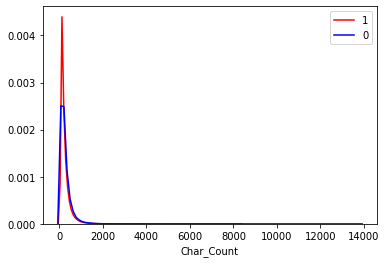

In [404]:
sns.distplot(X_train[X_train['Score']==1]['Char_Count'],label="1",color='red',hist=False)
sns.distplot(X_train[X_train['Score']==0]['Char_Count'],label="0",color='blue',hist=False)

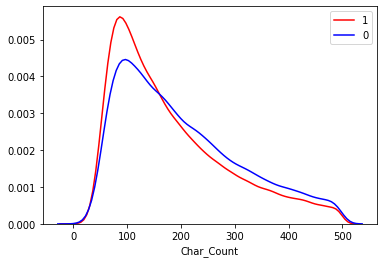

In [405]:
sns.distplot(X_train[(X_train['Score']==1) & (X_train['Char_Count']<500)]['Char_Count'],label="1",color='red',hist=False)
sns.distplot(X_train[(X_train['Score']==0) & (X_train['Char_Count']<500)]['Char_Count'],label="0",color='blue',hist=False)

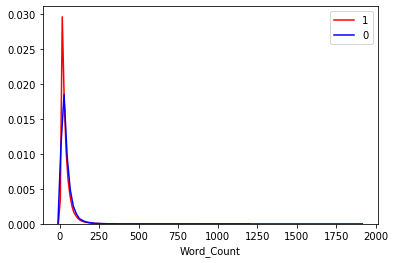

In [406]:
sns.distplot(X_train[X_train['Score']==1]['Word_Count'],label="1",color='red',hist=False)
sns.distplot(X_train[X_train['Score']==0]['Word_Count'],label="0",color='blue',hist=False)

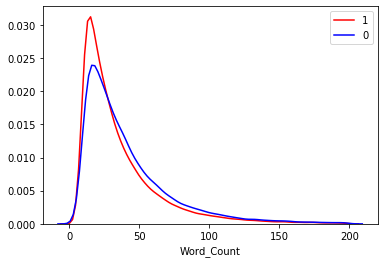

In [407]:
sns.distplot(X_train[(X_train['Score']==1) & (X_train['Word_Count']<200)]['Word_Count'],label="1",color='red',hist=False)
sns.distplot(X_train[(X_train['Score']==0) & (X_train['Word_Count']<200)]['Word_Count'],label="0",color='blue',hist=False)

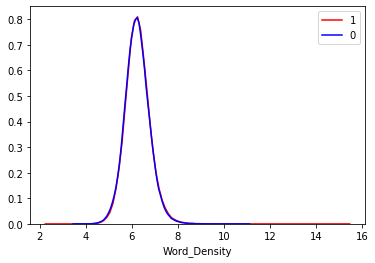

In [408]:
sns.distplot(X_train[X_train['Score']==1]['Word_Density'],label="1",color='red',hist=False)
sns.distplot(X_train[X_train['Score']==0]['Word_Density'],label="0",color='blue',hist=False)

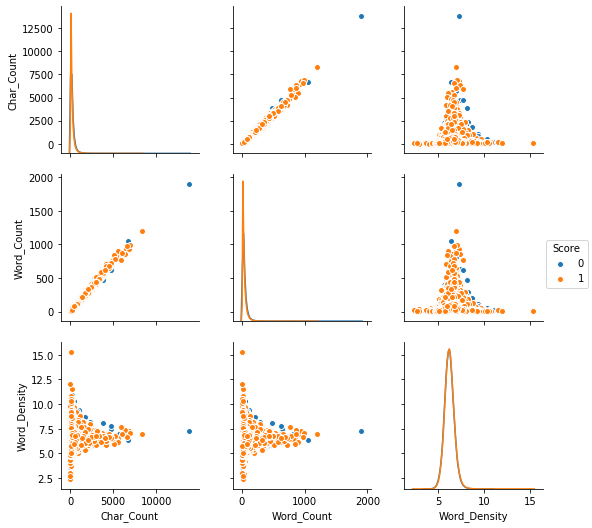

In [409]:
sns.pairplot(X_train.loc[:,['Char_Count','Word_Count','Word_Density','Score']],hue='Score',
             vars=['Char_Count','Word_Count','Word_Density'],diag_kind='kde')

In [410]:
X_train.head()

,Text,Score,Char_Count,Word_Count,Word_Density
198915,good product find keep digestion regular nice ...,1,99,16,6.187500
306964,first buy carton lipton change amazon price ch...,1,105,15,7.000000
6641,yeah gluten free whatever unless really big is...,0,431,66,6.530303
386509,make espresso delonghi magnifica super auto es...,1,168,23,7.304348
406748,great full bodied tea vanilla flavor creamer s...,1,85,14,6.071429


In [448]:
X_train_final=X_train['Text']
y_train_final=X_train['Score']

In [449]:
tfidf=TfidfVectorizer(min_df=0.1,max_df=0.9,ngram_range=(1,2))

In [450]:
X_tfidf=tfidf.fit_transform(X_train_final)

In [451]:
X_tfidf.get_shape()

(295181, 35)

In [452]:
logreg=LogisticRegression(class_weight='balanced',penalty='l1')
logreg.fit(X_tfidf,y_train_final)

C:\Users\Aditya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l1', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

In [458]:
train_predictions=logreg.predict(X_tfidf)

In [475]:
LogisticRegression()

array([[0.5185747 , 0.4814253 ],
       [0.28952164, 0.71047836],
       [0.43222607, 0.56777393],
       [0.50157506, 0.49842494],
       [0.50514951, 0.49485049]])

In [478]:
X_test[0:5]['Score']

220466    1
543616    1
199598    0
482694    1
52459     0
Name: Score, dtype: int64

In [459]:
accuracy_score(y_train_final,train_predictions)

0.6941097157337363

In [460]:
X_test.head()

,Text,Score
220466,carefully read everybodys review order really ...,Positive
543616,taste good easy use use much not taste good go...,Positive
199598,buy bean hope find successor brazilian santo g...,Negative
482694,building work remodel office temporarly locate...,Positive
52459,love cracker order amazon local costco stop ca...,Negative


In [461]:
X_test['Score']=X_test['Score'].map({'Positive':1,'Negative':0})

C:\Users\Aditya\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [462]:
X_test_tfidf=tfidf.transform(X_test['Text'])

In [463]:
test_predictions=logreg.predict(X_test_tfidf)

In [464]:
accuracy_score(X_test['Score'],test_predictions)

0.6961634229381575

In [465]:
confusion_matrix(X_test['Score'],test_predictions)

array([[15707,  5999],
       [23897, 52792]], dtype=int64)

In [466]:
X_test['Score'].value_counts(normalize=True)

1    0.779399
0    0.220601
Name: Score, dtype: float64

In [468]:
rm=RandomForestClassifier(class_weight='balanced')
rm.fit(X_tfidf,y_train_final)

C:\Users\Aditya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

In [469]:
train_predictions=rm.predict(X_tfidf)

In [470]:
accuracy_score(y_train_final,train_predictions)

0.9396438117629522

In [471]:
test_predictions=rm.predict(X_test_tfidf)

In [472]:
accuracy_score(X_test['Score'],test_predictions)

0.7601504141470603

In [473]:
confusion_matrix(X_test['Score'],test_predictions)

array([[ 8111, 13595],
       [10005, 66684]], dtype=int64)